In [1]:
# assignment_2 
# choose a dataset -> OCR

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn

In [3]:
# read train dataset and labels
test_data = pd.read_csv('ocr/test-data.csv')
test_target = pd.read_csv('ocr/test-targets.csv')
train_data = pd.read_csv('ocr/train-data.csv')
train_target = pd.read_csv('ocr/train-targets.csv')

# SVC with cross validation

In [4]:
# reshape data 
X, y = train_data, train_target
X_train = X
y_train = np.squeeze(np.asarray(y))

In [5]:
from sklearn.model_selection import KFold, cross_val_score
# import the classificator
from sklearn.svm import SVC

kf = KFold(n_splits = 3, shuffle = True, random_state = 42)
gammas = [0.04, 0.05, 0.06]

In [6]:
# find the best gamma
best_accuracy = 0
best_gamma = 0
for gamma in gammas:
  clf = SVC(C=10, kernel='rbf', gamma=gamma)
  scores_a = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv = kf, scoring = 'accuracy')
  if (scores_a.mean() > best_accuracy):
    best_accuracy = scores_a.mean()
    best_gamma = gamma

In [7]:
clf = SVC(C=10, kernel='rbf', gamma=best_gamma)
accuracy = best_accuracy

In [8]:
scores_p = cross_val_score(clf, X_train, y_train, cv = kf, n_jobs=-1, scoring = 'precision_weighted')
scores_r = cross_val_score(clf, X_train, y_train, cv = kf, n_jobs=-1, scoring = 'recall_weighted')
scores_f = cross_val_score(clf, X_train, y_train, cv = kf, n_jobs=-1, scoring = 'f1_weighted')

In [9]:
precision = scores_p.mean()
recall = scores_r.mean()
f1 = scores_f.mean()
print(accuracy)
print(precision)
print(recall)
print(f1)
print(best_gamma)

0.8959252747821127
0.896824572735369
0.8959252747821127
0.8953963236161576
0.05


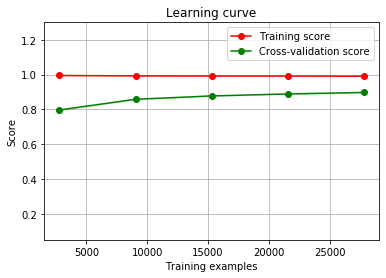

In [10]:
clf = SVC(C=10, kernel='rbf', gamma=best_gamma)
# Test your classifier using cross-validation over the training set
from sklearn.model_selection import learning_curve

plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, scoring='accuracy', cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the mean  for the training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the  std for the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot the mean  for the validation scores
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the std for the validation scores
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.ylim(0.05,1.3)             # set bottom and top limits for y axis
plt.legend()
plt.savefig('plot.png', dpi=300)
plt.show()

# SVC without cross validation

In [11]:
# Train your classifier over the full training set
X_train, y_train = train_data, train_target
X_test, y_test = test_data, test_target
y_train = np.squeeze(np.asarray(y_train))

In [12]:
# import the classificator
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=best_gamma)

# Training
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
report = metrics.classification_report(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9076701821668265

In [14]:
print(report)

              precision    recall  f1-score   support

           a       0.89      0.93      0.91       851
           b       0.96      0.96      0.96       250
           c       0.93      0.93      0.93       409
           d       0.87      0.93      0.90       270
           e       0.95      0.95      0.95      1009
           f       0.98      0.81      0.89       172
           g       0.85      0.90      0.87       527
           h       0.93      0.85      0.88       176
           i       0.93      0.86      0.89       945
           j       0.97      0.76      0.85        37
           k       0.87      0.87      0.87       184
           l       0.79      0.90      0.84       605
           m       0.96      0.97      0.97       318
           n       0.93      0.95      0.94       996
           o       0.94      0.96      0.95       796
           p       0.89      0.95      0.92       291
           q       0.85      0.49      0.62        69
           r       0.89    

In [18]:
# export predictions
data = pd.DataFrame(y_pred)
data.to_csv("data.csv", index=False, header=False)